# Table of contents

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Results

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\opetr\Desktop\PPP Loans\2. Data\2. Prepared Data\us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\opetr\Desktop\PPP Loans\2. Data\2. Prepared Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
path = r'C:\Users\opetr\Desktop\PPP Loans'

In [6]:
# Import data
df = pd.read_csv(os.path.join(path, '2. Data', '2. Prepared Data', 'clean_data.csv'), index_col = False)

In [7]:
df.head()

,Unnamed: 0,LoanNumber,DateApproved,ProcessingMethod,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,...,ServicingLenderName,RuralUrbanIndicator,BusinessAgeDescription,JobsReported,BusinessType,OriginatingLenderLocationID,OriginatingLender,NonProfit,ForgivenessAmount,ForgivenessDate
0,13,5502308207,2020-08-08,PPP,ANCHORAGE,AK,99503-7146,2021-07-22,Paid in Full,60,...,Northrim Bank,U,Existing or more than 2 years old,385.0,Limited Liability Company(LLC),116975,Northrim Bank,NaN,9615884.57,2021-06-11
1,14,6110847106,2020-04-14,PPP,BARROW,AK,99723,2021-08-21,Paid in Full,24,...,"National Cooperative Bank, National Association",R,Existing or more than 2 years old,295.0,Non-Profit Organization,89628,"National Cooperative Bank, National Association",Y,7761324.81,2021-07-13
2,15,4539098204,2020-08-06,PPP,Anchorage,AK,99502-1130,NaN,Exemption 4,60,...,Idaho First Bank,U,Existing or more than 2 years old,500.0,Corporation,436276,Idaho First Bank,NaN,4891430.37,2022-06-22
3,16,5120868804,2021-04-17,PPP,Anchorage,AK,99518-1105,2022-10-06,Paid in Full,60,...,First National Bank Alaska,U,Existing or more than 2 years old,500.0,501(c)3 – Non Profit,3386,First National Bank Alaska,Y,7321970.55,2022-09-13
4,17,6650277102,2020-04-14,PPP,HOMER,AK,99603,2021-06-09,Paid in Full,24,...,First National Bank Alaska,R,Existing or more than 2 years old,439.0,Corporation,3386,First National Bank Alaska,NaN,6598389.38,2021-05-18


In [8]:
df.shape

(968518, 23)

### 2. Data wrangling 

In [9]:
# Select only the necessary columns and put them in a list called columns

columns = ["BorrowerState",
           "ForgivenessAmount"]

In [10]:
# Create a subset

loan_state = df[columns]

In [11]:
loan_state.head()

,BorrowerState,ForgivenessAmount
0,AK,9615884.57
1,AK,7761324.81
2,AK,4891430.37
3,AK,7321970.55
4,AK,6598389.38


### 3. Conduct consistency checks

In [12]:
# Check for missing values

loan_state.isnull().sum()

# no states missing

BorrowerState            0
ForgivenessAmount    29646
dtype: int64

In [13]:
loan_state['BorrowerState'].value_counts

<bound method IndexOpsMixin.value_counts of 0         AK
1         AK
2         AK
3         AK
4         AK
          ..
968513    WY
968514    WY
968515    WY
968516    WY
968517    WY
Name: BorrowerState, Length: 968518, dtype: object>

In [14]:
# Drop missing values from the ForgivenessAmount column

loan_state.dropna(subset = ['ForgivenessAmount'], inplace = True)

C:\Users\opetr\AppData\Local\Temp\ipykernel_11556\3171277935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_state.dropna(subset = ['ForgivenessAmount'], inplace = True)


In [15]:
# Check that missing values were dropped

loan_state.isnull().sum()

BorrowerState        0
ForgivenessAmount    0
dtype: int64

##### Duplicates check

In [16]:
dups = df.duplicated()

In [17]:
dups.shape # no dups

(968518,)

##### Extreme values checks

<AxesSubplot:xlabel='ForgivenessAmount', ylabel='Count'>

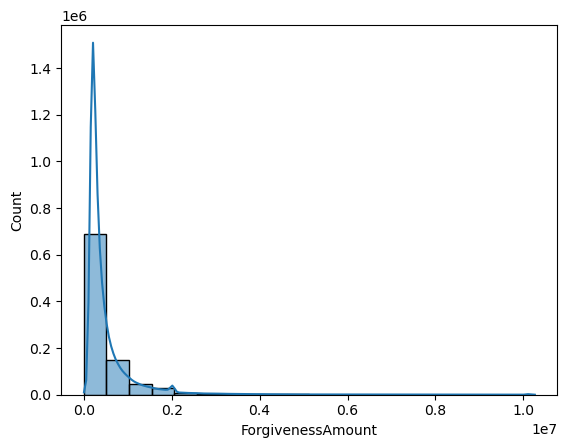

In [18]:
sns.histplot(loan_state['ForgivenessAmount'], bins = 20, kde = True) # shows extreme values for 'ForgivenessAmount'

In [19]:
loan_state['ForgivenessAmount'].mean() # Check the mean

528514.7923540983

In [20]:
loan_state['ForgivenessAmount'].median() # Check the median

295175.26

In [21]:
loan_state['ForgivenessAmount'].max() # Check the max

10265277.78

In [22]:
# Check how many extreme values

loan_state[loan_state['ForgivenessAmount'] > 2000000]

,BorrowerState,ForgivenessAmount
0,AK,9615884.57
1,AK,7761324.81
2,AK,4891430.37
3,AK,7321970.55
4,AK,6598389.38
...,...,...
966422,WY,2019397.26
966423,WY,2024328.77
966424,WY,2016986.30
966425,WY,2018618.51


In [23]:
# Clean extreme values

loan_state = loan_state[loan_state['ForgivenessAmount'] < 2000000] 

In [24]:
loan_state.shape

(904876, 2)

### 4. Plotting a choropleth

In [25]:
# Create a data frame with just the states and the values that need to be plotted

data_to_plot = loan_state[['BorrowerState','ForgivenessAmount']]
data_to_plot.head()

,BorrowerState,ForgivenessAmount
15,AK,532354.01
43,AK,501974.25
53,AK,1825612.72
57,AK,276225.87
63,AK,1923626.35


In [26]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['BorrowerState', 'ForgivenessAmount'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Forgiveness Amount").add_to(map)
folium.LayerControl().add_to(map)

map

In [27]:
map.save('plot_data.html')

### 5. Results

##### The analysis shows that the states with the lowest loan amount granted were Pennsylvania and Mississippi.
##### The states with the highest loan amount granted are primarily located in the Midwest and South.
##### Most of the US seems to have been uniformly granted a comparable amount of money through the PPP program, regardless of its size or population.
##### This raises the question whether the businesses located in the states with the highest loan amounts have anything in common - like its size or business age.
##### Since PA is the state with visibly the least loan amount, a future analysis could help answer whether less businesses from PA applied for a PPP loan, or if they were less likely to be approved for a loan (initial approval amount vs current approval amount)